# Part 2 - Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) is a data analysis method that helps data scientists understand their data and identify patterns. It's often used as the first step in data analysis.

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/created_raw_data.csv')
print(df.shape)
print(df.info())
df.head()

(1010, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   binary                 807 non-null    object 
 1   given_name             505 non-null    object 
 2   surname                807 non-null    object 
 3   date_of_birth          910 non-null    object 
 4   phone_number           505 non-null    object 
 5   email                  909 non-null    object 
 6   address                629 non-null    object 
 7   city                   451 non-null    object 
 8   state                  816 non-null    object 
 9   zipcode                630 non-null    float64
 10  pd qcut2               706 non-null    object 
 11  random choice 4        507 non-null    object 
 12  random choice 2        1010 non-null   object 
 13  target                 1010 non-null   float64
 14  semi_constant_1        1010 non-null   object

,binary,given_name,surname,date_of_birth,phone_number,email,address,city,state,zipcode,...,correlated w target 1,random label num 13,outliers 2,corr_feature_class,informative_1,multicollinearity 2,random label num 4,informative_2,pd qcut1,class
0,binary_2,Shane,Mendoza,1954-06-04,NaN,michael50@example.net,823 Katie Stream Suite 188,NaN,MI,73043.0,...,0.109861,label num hi 7,NaN,-0.468511,-0.999102,0.328597,label num lo 2,-0.663860,Low,1
1,NaN,Teresa,Haney,1923-07-14,001-431-690-1160x342,joshuagraham@example.net,7882 Reynolds Isle Suite 598,NaN,WV,NaN,...,3.514334,label num hi 3,3.624024,0.864619,1.246686,NaN,label num lo 4,1.153597,High,1
2,binary_1,Jessica,NaN,1989-09-06,490.633.0179x173,elizabethperez@example.com,NaN,NaN,MA,50989.0,...,2.395082,label num hi 6,NaN,0.427548,0.962777,-3.011913,label num lo 2,0.859397,High,1
3,NaN,NaN,Jennings,1909-07-01,(992)673-5294x88072,john20@example.com,7340 Fox Pass,NaN,RI,64545.0,...,2.577450,label num hi 10,NaN,NaN,-2.957441,1.034870,label num lo 2,2.033645,High,1
4,NaN,NaN,Hunter,1938-02-08,522-426-5009,nancy25@example.com,NaN,NaN,NaN,NaN,...,-0.965368,NaN,5.409362,0.677767,1.141165,0.360293,label num lo 2,1.059449,High,1


## Var Types

In [ ]:
df_numerical = df.select_dtypes(include='number').columns
df_object = df.select_dtypes(include=['object']).columns
df_discreet = df.select_dtypes(include=['category']).columns
df_categorical_features = df.select_dtypes(include=['category', 'object']).columns
df_discreet

Index([], dtype='object')

In [ ]:
import numpy as np
import pickle

df_numerical = df.select_dtypes(exclude=['category', 'object']).columns.to_list()
df_object = df.select_dtypes(include=['object']).columns.to_list()
df_discreet = df.select_dtypes(include=['category']).columns.to_list()
df_categorical_features = df.select_dtypes(include=['category', 'object']).columns.to_list()

# Create a variable to pickle
data = {'df_numerical': df_numerical, 'df_object': df_object, 'df_discreet': df_discreet, 'df_categorical_features': df_categorical_features}

# Pickle the variable and save it to a file
with open('/var_types.pkl', 'wb') as f:
    pickle.dump(data, f)


## Correlation

In [ ]:
# code along
df._get_numeric_data().corr().round(2)

,zipcode,target,min max scaling,outliers 1,uniform corr 2,multicollinearity 3,duplicate_2,correlated w target 2,multicollinearity 1,duplicate_1,uniform corr 1,multicollinearity 4,standard scaling,correlated w target 1,outliers 2,corr_feature_class,informative_1,multicollinearity 2,informative_2,class
zipcode,1.00,-0.02,0.02,-0.03,0.00,-0.02,-0.02,-0.03,0.02,-0.04,-0.01,-0.04,-0.04,-0.11,-0.06,-0.04,-0.04,-0.02,-0.02,-0.02
target,-0.02,1.00,0.03,0.01,0.74,0.07,0.99,0.66,0.03,-0.03,0.72,0.07,-0.01,0.48,0.01,0.24,-0.03,0.04,0.99,0.72
min max scaling,0.02,0.03,1.00,0.01,0.00,-0.09,0.03,0.10,0.03,0.04,0.03,-0.06,-0.02,0.02,0.08,-0.04,0.04,0.03,0.03,0.04
outliers 1,-0.03,0.01,0.01,1.00,0.04,-0.02,0.00,-0.01,-0.05,-0.06,0.03,0.01,-0.05,-0.03,-0.04,0.01,-0.06,-0.01,0.00,-0.01
uniform corr 2,0.00,0.74,0.00,0.04,1.00,-0.00,0.74,0.46,-0.02,0.00,0.55,0.04,-0.01,0.31,-0.03,0.16,0.00,0.01,0.74,0.57
multicollinearity 3,-0.02,0.07,-0.09,-0.02,-0.00,1.00,0.06,0.06,0.04,-0.05,0.01,0.91,-0.00,-0.04,0.05,-0.01,-0.05,0.03,0.06,0.05
duplicate_2,-0.02,0.99,0.03,0.00,0.74,0.06,1.00,0.66,0.04,0.10,0.72,0.07,-0.01,0.47,0.02,0.23,0.10,0.04,1.00,0.72
correlated w target 2,-0.03,0.66,0.10,-0.01,0.46,0.06,0.66,1.00,0.09,-0.04,0.57,0.08,0.04,0.30,0.03,0.12,-0.04,0.05,0.66,0.45
multicollinearity 1,0.02,0.03,0.03,-0.05,-0.02,0.04,0.04,0.09,1.00,0.02,-0.00,0.00,-0.05,0.03,0.01,0.02,0.02,0.67,0.04,-0.02
duplicate_1,-0.04,-0.03,0.04,-0.06,0.00,-0.05,0.10,-0.04,0.02,1.00,0.01,-0.01,0.03,0.00,0.01,-0.01,1.00,-0.03,0.10,-0.01


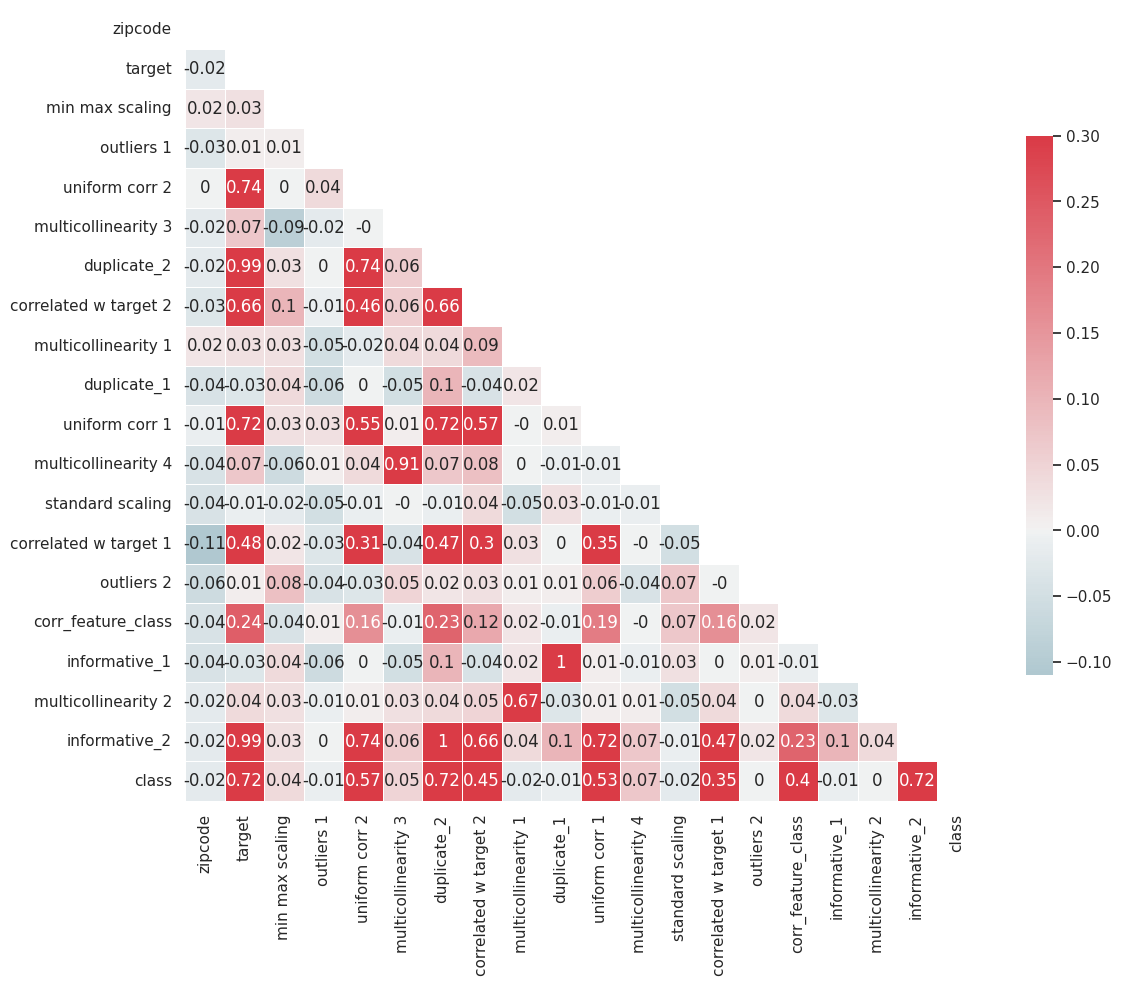

In [ ]:
# show correlation between the features
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = df._get_numeric_data().corr().round(2)

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(12, 12))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

In [ ]:
import pickle

# calculate the correlation matrix
corr_matrix = df._get_numeric_data().corr()

# Create a mask for the upper triangle (to avoid duplicates)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Convert the correlation matrix to a long format
corr_df = corr_matrix.stack().reset_index()
corr_df.columns = ['feature1', 'feature2', 'correlation']

# Filter for correlations above a certain threshold (e.g., 0.7)
high_corr_df = corr_df[(abs(corr_df['correlation']) > 0.7) & (corr_df['feature1'] != corr_df['feature2'])]

# Sort by absolute correlation in descending order
high_corr_df = high_corr_df.sort_values(by='correlation', ascending=False, key=abs)

# Print the top correlated features
# print(high_corr_df['feature1'].to_list()[4:10])
print(high_corr_df)

# Create a variable to pickle
data = {'correlation scores': high_corr_df}

# Pickle the variable and save it to a file
with open('/correlation_scores.pkl', 'wb') as f:
    pickle.dump(data, f)

                feature1             feature2  correlation
196          duplicate_1        informative_1     1.000000
138          duplicate_2        informative_2     1.000000
366        informative_2          duplicate_2     1.000000
329        informative_1          duplicate_1     1.000000
38                target        informative_2     0.991500
361        informative_2               target     0.991500
26                target          duplicate_2     0.991500
121          duplicate_2               target     0.991500
225  multicollinearity 4  multicollinearity 3     0.907180
111  multicollinearity 3  multicollinearity 4     0.907180
24                target       uniform corr 2     0.744031
81        uniform corr 2               target     0.744031
364        informative_2       uniform corr 2     0.739380
98        uniform corr 2        informative_2     0.739380
86        uniform corr 2          duplicate_2     0.739380
124          duplicate_2       uniform corr 2     0.7393

In [ ]:
# check for vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# handle null values (using mean imputation for simplicity)
x_copy = df.drop('class', axis=1)._get_numeric_data()
x_copy.fillna(x_copy.mean(), inplace=True)

print(max([variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]))

# calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy.columns
vif["VIF"] = [variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]
print(vif)

inf
                 Variable           VIF
0                 zipcode  1.016263e+00
1                  target  1.131872e+04
2         min max scaling  1.016981e+00
3              outliers 1  1.014889e+00
4          uniform corr 2  1.634443e+00
5     multicollinearity 3  1.707477e+00
6             duplicate_2           inf
7   correlated w target 2  1.294013e+00
8     multicollinearity 1  1.699447e+00
9             duplicate_1           inf
10         uniform corr 1  1.396174e+00
11    multicollinearity 4  1.707974e+00
12       standard scaling  1.017128e+00
13  correlated w target 1  1.325959e+00
14             outliers 2  1.012407e+00
15     corr_feature_class  1.058138e+00
16          informative_1           inf
17    multicollinearity 2  1.686609e+00
18          informative_2           inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


## Multicollinearity

* We want high correlation with target
* We don't want high correlation between features
* Drop correlated features
* Combine correlated features

In [ ]:
# iterate dropping features with high vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

removed1=[]
x_copy1 = x_copy.copy()
max_vif = thresh = 10
while max_vif >= thresh:
  my_list = [variance_inflation_factor(x_copy1, i) for i in range(x_copy1.shape[1])]
  max_vif = max(my_list)
  if max_vif > thresh:
    max_index = my_list.index(max_vif)
    removed1.append(x_copy1.columns[max_index])
    print(x_copy1.columns[max_index], variance_inflation_factor(x_copy1, max_index))
    x_copy1.drop(x_copy1.columns[max_index], axis=1, inplace=True)


# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy1.columns
vif["VIF"] = [variance_inflation_factor(x_copy1, i) for i in range(x_copy1.shape[1])]
print(vif)

# Create a variable to pickle
data = {'vif': vif}

# Pickle the variable and save it to a file
with open('/vif.pkl', 'wb') as f:
    pickle.dump(data, f)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


duplicate_2 inf
duplicate_1 inf
target 11318.72168859731
standard scaling 15.615086458806521
                 Variable       VIF
0                 zipcode  5.452263
1         min max scaling  8.390076
2              outliers 1  1.012615
3          uniform corr 2  6.322710
4     multicollinearity 3  1.708936
5   correlated w target 2  1.299956
6     multicollinearity 1  1.700056
7          uniform corr 1  7.520658
8     multicollinearity 4  1.701153
9   correlated w target 1  1.326560
10             outliers 2  4.684650
11     corr_feature_class  1.597090
12          informative_1  1.043202
13    multicollinearity 2  1.694244
14          informative_2  2.211704


In [ ]:
# check again vif
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

removed2=[]
max_vif = thresh = 10
while max_vif >= thresh:
  max_vif = max([variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])])
  for i in range(x_copy.shape[1]):
    if variance_inflation_factor(x_copy, i) > thresh:
      removed2.append(x_copy.columns[i])
      print(x_copy.columns[i], variance_inflation_factor(x_copy, i))
      x_copy.drop(x_copy.columns[i], axis=1, inplace=True)
      break

# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = x_copy.columns
vif["VIF"] = [variance_inflation_factor(x_copy, i) for i in range(x_copy.shape[1])]
print(vif)

target 11318.72168859731
duplicate_2 inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


duplicate_1 inf
standard scaling 15.615086458806521
                 Variable       VIF
0                 zipcode  5.452263
1         min max scaling  8.390076
2              outliers 1  1.012615
3          uniform corr 2  6.322710
4     multicollinearity 3  1.708936
5   correlated w target 2  1.299956
6     multicollinearity 1  1.700056
7          uniform corr 1  7.520658
8     multicollinearity 4  1.701153
9   correlated w target 1  1.326560
10             outliers 2  4.684650
11     corr_feature_class  1.597090
12          informative_1  1.043202
13    multicollinearity 2  1.694244
14          informative_2  2.211704


In [ ]:
print(removed1)
print(removed2)

['duplicate_2', 'duplicate_1', 'target', 'standard scaling']
['target', 'duplicate_2', 'duplicate_1', 'standard scaling']


## Outliers

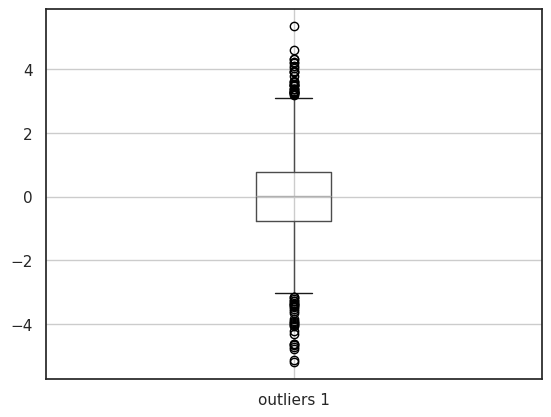

In [ ]:
# code along
df.boxplot(column=['outliers 1']);

In [ ]:
# code along
df.describe()

,zipcode,target,min max scaling,outliers 1,uniform corr 2,multicollinearity 3,duplicate_2,correlated w target 2,multicollinearity 1,duplicate_1,uniform corr 1,multicollinearity 4,standard scaling,correlated w target 1,outliers 2,corr_feature_class,informative_1,multicollinearity 2,informative_2,class
count,630.000000,1010.000000,960.000000,1010.000000,707.000000,506.000000,1010.000000,504.000000,1010.000000,1010.000000,505.000000,959.000000,910.000000,1010.000000,505.000000,809.000000,1010.000000,908.000000,1010.000000,1010.000000
mean,52970.607937,0.195609,333.259017,-0.005379,0.473221,-0.021320,-0.018978,0.168166,-0.038805,-0.047372,0.494668,-0.008641,49472.937147,0.294785,3.139067,1.937438,-0.047372,-0.064808,-0.018978,0.502970
std,29035.226235,2.991347,105.267241,1.420178,0.294698,1.024297,1.403413,2.895750,0.978815,1.324010,0.290534,0.999625,10242.502125,3.049791,2.171989,2.916113,1.324010,0.982871,1.403413,0.500239
min,724.000000,-8.943212,18.744429,-5.181912,0.001415,-2.861361,-4.543441,-6.981214,-2.892396,-3.836929,0.001406,-2.902416,15926.341599,-10.015918,-2.526166,-8.278158,-3.836929,-3.745778,-4.543441,0.000000
25%,27866.250000,-2.166961,259.231269,-0.768024,0.213893,-0.718991,-1.050339,-1.831616,-0.654949,-1.018399,0.237874,-0.695158,42520.733416,-1.757668,1.618140,0.258486,-1.018399,-0.674960,-1.050339,0.000000
50%,55738.500000,-0.011259,336.053690,0.007848,0.446891,-0.031787,-0.194004,0.213337,-0.069756,-0.224366,0.468462,0.021721,49494.206295,0.206567,3.171758,1.768612,-0.224366,-0.057106,-0.194004,1.000000
75%,77829.250000,2.367192,404.263034,0.777824,0.720685,0.622812,0.991017,2.209569,0.592480,0.975364,0.758721,0.669452,56733.704585,2.388965,4.501155,3.754586,0.975364,0.575964,0.991017,1.000000
max,99826.000000,9.299296,632.278233,5.349789,0.998351,3.193532,4.020262,8.909424,2.803915,3.994644,0.998559,3.268669,81447.523046,11.249439,9.733845,22.101345,3.994644,3.191959,4.020262,1.000000


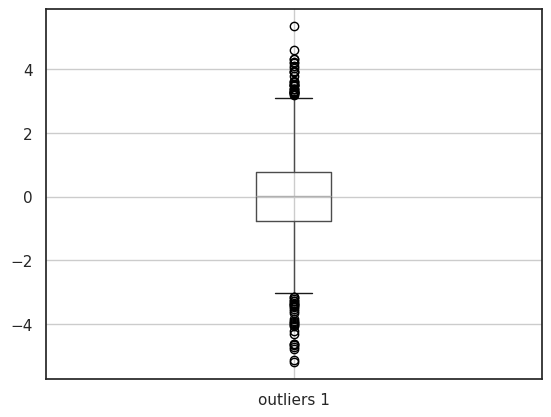

In [ ]:
# code along
df.boxplot(column=['outliers 1']);

# Calculate the outliers (example using IQR method)
Q1 = df['outliers 1'].quantile(0.25)
Q3 = df['outliers 1'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['outliers 1'] < (Q1 - 1.5 * IQR)) | (df['outliers 1'] > (Q3 + 1.5 * IQR))]

# Create a variable to pickle
data = {'outliers': outliers}

# Pickle the variable and save it to a file
with open('/outliers.pkl', 'wb') as f:
    pickle.dump(data, f)

In [ ]:
# code along
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   binary                 807 non-null    object 
 1   given_name             505 non-null    object 
 2   surname                807 non-null    object 
 3   date_of_birth          910 non-null    object 
 4   phone_number           505 non-null    object 
 5   email                  909 non-null    object 
 6   address                629 non-null    object 
 7   city                   451 non-null    object 
 8   state                  816 non-null    object 
 9   zipcode                630 non-null    float64
 10  pd qcut2               706 non-null    object 
 11  random choice 4        507 non-null    object 
 12  random choice 2        1010 non-null   object 
 13  target                 1010 non-null   float64
 14  semi_constant_1        1010 non-null   object 
 15  min 